In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## Random Vectors ##

Vectors and matrices give us a compact way of referring to random sequences like $X_1, X_2, \ldots, X_n$. The algebra of vectors and matrices gives us powerful tools for studying linear combinations of random variables.

In this section we will develop matrix notation for random sequences and then express familiar consequences of linearity of expectation and bilinearity of covariance in matrix notation. The probability theory in this section is not new – it consists of expectation and covariance facts that you have known for some time. But the representation is new and leads us to new insights.

A *vector valued random variable*, or more simply, a *random vector*, is a list of random variables defined on the same space. We will think of it as an $n \times 1$ column vector.

$$
\mathbf{X} ~ = ~ 
\begin{bmatrix}
X_1 \\
X_2 \\
\vdots \\
X_n
\end{bmatrix}
$$

For ease of display, we will sometimes write $\mathbf{X} = [X_1 X_2 \ldots X_n]^T$ where $\mathbf{M}^T$ is notation for the transpose of the matrix $\mathbf{M}$.

The *mean vector* of $\mathbf{X}$ is $\boldsymbol{\mu} = [\mu_1 ~ \mu_2 ~ \ldots ~ \mu_n]^T$ where $\mu_i = E(X_i)$.

The *covariance matrix* of $\mathbf{X}$ is the $n \times n$ matrix $\boldsymbol{\Sigma}$ whose $(i, j)$ element is $Cov(X_i, X_j)$. 

The $i$th diagonal element of $\boldsymbol{\Sigma}$ is the variance of $X_i$. The matrix is symmetric because of the symmetry of covariance.

```{admonition} Quick Check
A random vector $\begin{bmatrix} X \\ Y \end{bmatrix}$ has mean vector $\begin{bmatrix} 0 \\ 0 \end{bmatrix}$ and covariance matrix $\begin{bmatrix} 1 & 2.4 \\ ? & 9\end{bmatrix}$.

Which (if any) of $X$ and $Y$ are in standard units? Pick one option.

(i) Only $X$

(ii) Only $Y$

(iii) Both $X$ and $Y$

(iv) Neither $X$ nor $Y$

(v) There is not enough information to answer.

```

```{admonition} Answer
:class: dropdown
(i)

```

```{admonition} Quick Check
(Continuing the Quick Check above) Fill in the ? in the covariance matrix.

```

```{admonition} Answer
:class: dropdown
$2.4$

```

```{admonition} Quick Check
(Continuing the Quick Check above) Find the correlation between $X$ and $Y$.

```

```{admonition} Answer
:class: dropdown
$0.8$

```

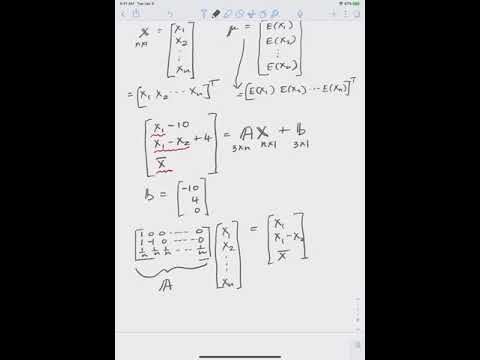

In [2]:
# VIDEO: Linear Transformation
from IPython.display import YouTubeVideo

YouTubeVideo('yE1FWjup0WE')

### Linear Transformation: Mean Vector ###
Let $\mathbf{A}$ be an $m \times n$ numerical matrix and $\mathbf{b}$ an $m \times 1$ numerical vector. Consider the $m \times 1$ random vector  $\mathbf{Y} = \mathbf{AX} + \mathbf{b}$. 

We will call this a "linear transformation" of $\mathbf{X}$ though in fact it is an *affine* transformation, that is, a composition of the linear transformation $\mathbf{AX}$ and the translation by $\mathbf{b}$.

This representation gives us a compact way to describe multiple linear combinations of $\mathbf{X}$ simultaneously. For example, if $\mathbf{b} = [0 ~~ 0 ~~ 0]^T$ and 

$$
\mathbf{A} ~ = ~ 
\begin{bmatrix}
1 & 0 & 0 & 0 & \cdots & 0 \\
1 & -1 & 0 & 0 & \cdots & 0 \\
\frac{1}{n} & \frac{1}{n} & \frac{1}{n} & \frac{1}{n} & \cdots & \frac{1}{n} 
\end{bmatrix}
$$

then

$$
\mathbf{AX} + \mathbf{b} ~ = ~ 
\begin{bmatrix}
X_1 \\
X_1 - X_2 \\
\bar{X}_n 
\end{bmatrix}
$$

In general, if $\mathbf{Y} = \mathbf{AX} + \mathbf{b}$ then the $i$th element of $\mathbf{Y}$ is 

$$
Y_i ~ = ~ \mathbf{A}_{i*}\mathbf{X} + \mathbf{b}(i)
$$ 

where $\mathbf{A}_{i*}$ denotes the $i$th row of $\mathbf{A}$ and $\mathbf{b}(i)$ denotes the $i$th element of $\mathbf{b}$. Written longhand,

$$
Y_i ~ = ~ a_{i1}X_1 + a_{i2}X_2 + \cdots + a_{in}X_n + b_i
$$

where $a_{ij}$ is the $(i, j)$ entry of $\mathbf{A}$ and $b_i = \mathbf{b}(i)$.

Thus $Y_i$ is a linear combination of the elements of $\mathbf{X}$. Therefore by linearity of expectation,

$$
E(Y_i) ~ = ~ \mathbf{A}_{i*} \boldsymbol{\mu} + \mathbf{b}(i)
$$

Let $\boldsymbol{\mu}_\mathbf{Y}$ be the mean vector of $\mathbf{Y}$. Then by the calculation above,

$$
\boldsymbol{\mu}_\mathbf{Y} ~ = ~ \mathbf{A} \boldsymbol{\mu} + \mathbf{b}
$$


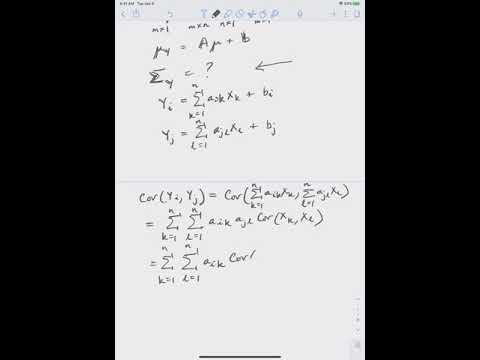

In [3]:
# VIDEO: Covariance Matrix of a Linear Transformation

YouTubeVideo('XvQa07eQDj0')

### Linear Transformation: Covariance Matrix ###

$Cov(Y_i, Y_j)$ can be calculated using bilinearity of covariance.

$$
\begin{align*}
Cov(Y_i, Y_j) ~ &= ~ Cov(\mathbf{A}_{i*}\mathbf{X}, \mathbf{A}_{j*}\mathbf{X}) \\
&= ~ Cov\big{(} \sum_{k=1}^n a_{ik}X_k, \sum_{l=1}^n a_{jl}X_l \big{)} \\
&= ~ \sum_{k=1}^n\sum_{l=1}^n a_{ik}a_{jl}Cov(X_k, X_l) \\
&= ~ \sum_{k=1}^n\sum_{l=1}^n a_{ik}Cov(X_k, X_l)t_{lj} ~~~~~ \text{where } t_{lj} = \mathbf{A}^T(l, j) \\
\end{align*}
$$

This is the $(i, j)$ element of $\mathbf{A}\boldsymbol{\Sigma}\mathbf{A}^T$. So if $\boldsymbol{\Sigma}_\mathbf{Y}$ denotes the covariance matrix $\mathbf{Y}$, then

$$
\boldsymbol{\Sigma}_\mathbf{Y} ~ = ~ \mathbf{A} \boldsymbol{\Sigma} \mathbf{A}^T
$$

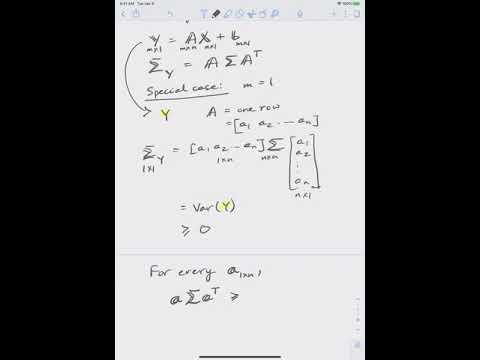

In [4]:
# VIDEO: Constraint on Covariance Matrix

YouTubeVideo('75RtwtxoRLw')

Let us see what this formula implies for the variance of a single component of $\mathbf{Y}$.

Any component of $\mathbf{Y}$ is a linear combination of the elements of $\mathbf{X}$ and hence can be written as $\mathbf{aX}+b$ for some $1 \times n$ vector $\mathbf{a}$ and some real number $b$. 

The variance of this component of $\mathbf{Y}$ is a diagonal element of $\boldsymbol{\Sigma}_\mathbf{Y}$. By our calculation above, the diagonal element is equal to $\mathbf{a}\boldsymbol{\Sigma}\mathbf{a}^T$.

### Constraints on $\boldsymbol{\Sigma}$ ###

We know that $\boldsymbol{\Sigma}$ has to be symmetric. Also, no matter what $\mathbf{A}$ is, the elements on the main diagonal of $\boldsymbol{\Sigma}_\mathbf{Y}$ must all be non-negative as they are the variances of the elements of $\mathbf{Y}$. 

By the observation above, this implies

$$
\mathbf{a} \boldsymbol{\Sigma} \mathbf{a}^T ~ \ge ~ 0 ~~~~ \text{for all } 1\times n \text{ vectors } \mathbf{a}
$$

That is, $\boldsymbol{\Sigma}$ must be *positive semidefinite*. 

Usually, we will be working with covariance matrices that are *positive definite*, defined by

$$
\mathbf{a} \boldsymbol{\Sigma} \mathbf{a}^T ~ > ~ 0 ~~~~ \text{for all } 1\times n \text{ vectors } \mathbf{a}
$$

The reason is that if $\mathbf{a} \boldsymbol{\Sigma} \mathbf{a}^T = 0$ for some $\mathbf{a}$, then the linear transformation $\mathbf{aX}$ has variance $0$ and hence is a constant. Hence you can write some of the elements of $\mathbf{X}$ as linear combinations of the others and just study a reduced set of elements.